<a href="https://colab.research.google.com/github/OsvaldoMS1982/UNIR/blob/main/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar dependencias

In [1]:
!pip install transformers datasets sqlparse editdistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

Descargar spider de github

In [2]:
!git clone https://github.com/taoyds/spider.git

Cloning into 'spider'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 386 (delta 18), reused 15 (delta 13), pack-reused 356 (from 1)
Receiving objects: 100% (386/386), 44.93 MiB | 10.81 MiB/s, done.
Resolving deltas: 100% (112/112), done.


Cargar el archivo train others desde el drive local

In [3]:
from google.colab import files

uploaded = files.upload()  # Esto te pedirá subir el archivo manualmente

Saving train_others.json to train_others.json


Revisar si el archivo train spider aparece como parte de la carpeta de spider

In [ ]:
import os
print(os.listdir("spider/"))  # Lista archivos en la carpeta 'spider'

['evaluation_examples', 'LICENSE', 'baselines', 'README.md', 'process_sql.py', '.git', 'preprocess', 'evaluation.py', 'train_spider.json']


Revisar si la ruta ahora existe

In [4]:
import os
print(os.path.abspath("spider/train_spider.json"))

/content/spider/train_spider.json


Ejecuta este código para cargar train_spider.json en un DataFrame y analizar las consultas en lenguaje natural:

In [12]:
import json
import pandas as pd

# Cargar el dataset
file_path = "spider/train_spider.json"  # Ajusta si has subido el archivo manualmente

with open(file_path, "r", encoding="utf-8") as f:
    spider_data = json.load(f)

# Convertir a DataFrame
df = pd.DataFrame(spider_data)
df = df[["question", "query"]]  # Solo conservar las columnas relevantes
df.head(10)

,question,query
0,what is the biggest city in wyoming,SELECT city_name FROM city WHERE population =...
1,what wyoming city has the largest population,SELECT city_name FROM city WHERE population =...
2,what is the largest city in wyoming,SELECT city_name FROM city WHERE population =...
3,where is the most populated area of wyoming,SELECT city_name FROM city WHERE population =...
4,which city in wyoming has the largest population,SELECT city_name FROM city WHERE population =...
5,what cities in wyoming have the highest number...,SELECT city_name FROM city WHERE population =...
6,what cities in wyoming have the highest popula...,SELECT city_name FROM city WHERE population =...
7,what is the most populous city in wyoming,SELECT city_name FROM city WHERE population =...
8,what is the largest city in wyoming by population,SELECT city_name FROM city WHERE population =...
9,what is the largest city of wyoming,SELECT city_name FROM city WHERE population =...


Puedes probar GPT-4, T5, Codex o cualquier otro modelo que traduzca NLP a SQL.

In [7]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Cargar el modelo
model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Función para convertir NLP a SQL
def nlp_to_sql(nl_query):
    input_text = f"translate English to SQL: {nl_query}"
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
    outputs = model.generate(**inputs)
    sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return sql_query

# Prueba con una consulta del dataset
example_nlp = df.iloc[1]["question"]
generated_sql = nlp_to_sql(example_nlp)

print("📝 Pregunta en lenguaje natural:", example_nlp)
# print("🔍 SQL Generado:", generated_sql)
print("✅ SQL Real:", df.iloc[1]["query"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

📝 Pregunta en lenguaje natural: what wyoming city has the largest population
✅ SQL Real: SELECT city_name FROM city WHERE population  =  ( SELECT MAX ( population ) FROM city WHERE state_name  =  "wyoming" ) AND state_name  =  "wyoming";


Para medir cuántas variaciones SQL existen para la misma pregunta NLP en el dataset, usa este código:

In [10]:
from collections import defaultdict
import editdistance

# Evaluar ambigüedad
query_variations = defaultdict(set)

for entry in spider_data:
    nl_query = entry["question"]
    sql_query = entry["query"]
    query_variations[nl_query].add(sql_query)

results = []
for nl_query, sql_variants in query_variations.items():
    num_variants = len(sql_variants)
    avg_edit_distance = sum(editdistance.eval(q1, q2) for q1 in sql_variants for q2 in sql_variants if q1 != q2) / max(1, num_variants*(num_variants-1))
    results.append((nl_query, num_variants, avg_edit_distance, list(sql_variants)))

df_results = pd.DataFrame(results, columns=["Consulta NLP", "Variaciones SQL", "Distancia de Edición Promedio", "Consultas SQL Generadas"])
df_results.head()

,Consulta NLP,Variaciones SQL,Distancia de Edición Promedio,Consultas SQL Generadas
0,what is the biggest city in wyoming,1,0.0,[SELECT city_name FROM city WHERE population ...
1,what wyoming city has the largest population,1,0.0,[SELECT city_name FROM city WHERE population ...
2,what is the largest city in wyoming,1,0.0,[SELECT city_name FROM city WHERE population ...
3,where is the most populated area of wyoming,1,0.0,[SELECT city_name FROM city WHERE population ...
4,which city in wyoming has the largest population,1,0.0,[SELECT city_name FROM city WHERE population ...


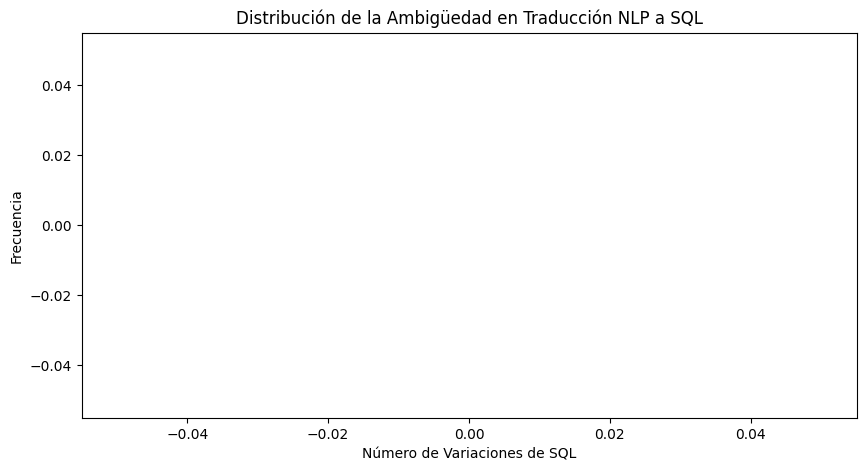

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_results["Variaciones SQL"], bins=range(1, df_results["Variaciones SQL"].max() + 1), edgecolor='black')
plt.xlabel("Número de Variaciones de SQL")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Ambigüedad en Traducción NLP a SQL")
plt.show()